# Creating a cluster of two nodes, connected to each other.

This Notebook will give a gentle introduction to fabric testbed. This notebook aims to aggregate much of the knowledge already available.

The objective of this notebook is:
* Create a slice at a site.
* Configuring(adding) two nodes in the slice.
* Assigning IP address to the nodes.
* Checking the accessibility of the nodes.

##### <i> This notebook assumes that you have a fabric environment already setup in fabric's JupyterHub. If not please go through the "start_here.ipynb" available in fabric's jupyterHub under jupyter-example folder. </i>

In [ ]:
# Importing the FABlib library

from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager

fablib = fablib_manager()

fablib.show_config()

### Listing all the availabe resources of fabric testbed. 

Fabric testbed uses multiple sites (location) where compute resources are hosted.

In [2]:
try:
    print(f"{fablib.list_sites()}")
except Exception as e:
    print(f"Exception :{e}")

Name      CPUs  Cores    RAM (G)    Disk (G)       Basic (100 Gbps NIC)    ConnectX-6 (100 Gbps x2 NIC)    ConnectX-5 (25 Gbps x2 NIC)    P4510 (NVMe 1TB)    Tesla T4 (GPU)    RTX6000 (GPU)
------  ------  -------  ---------  -------------  ----------------------  ------------------------------  -----------------------------  ------------------  ----------------  ---------------
TACC        10  178/320  2004/2560  114930/116400  579/635                 0/2                             1/4                            16/16               4/4               2/6
NCSA         6  172/192  1456/1536  60480/60600    378/381                 2/2                             2/2                            10/10               2/2               3/3
STAR        12  280/384  2896/3072  120550/121200  744/762                 2/2                             6/6                            20/20               6/6               6/6
UTAH        10  300/320  2520/2560  115900/116400  630/635                 2/2

### List all the recources of a single site. 

In [2]:
# Use any other site name. Site name can be found from the 'Name' column, as shown above.

site_name='SALT'
try:
    print(f"{fablib.show_site(site_name)}")
except Exception as e:
          print(f"Exception: {e}")

----------------------------  ----------------------------------------
Name                          SALT
CPUs                          6
Cores ()                      168/192
RAM (G)                       1488/1536
Disk (G)                      60090/60600
Worker Count                  3
Physical Address              572 Delong St,Salt Lake City, UT  84104
Location Coordinates          (40.75707505789612, -111.95346637770317)
Basic (100 Gbps NIC)          375/381
ConnectX-6 (100 Gbps x2 NIC)  2/2
ConnectX-5 (25 Gbps x2 NIC)   2/2
P4510 (NVMe 1TB)              10/10
Tesla T4 (GPU)                2/2
RTX6000 (GPU)                 3/3
----------------------------  ----------------------------------------


### Creating a slice.

A slice usually means compute resources attached together to form some kind of topology. These compute resources can be computers, network cards, GPUs, FPGAs etc. There are many ways to create a slice for detailed knowledge please refer to "create_slice.ipynb" in jupyter-example folder.

To create a slice with two nodes that are connected to each other in the same site. First name the components that will be used to create a slice.

In [3]:
# name of the slice
slice_name='two_node_exp'

# name of the two nodes
node1_name='Node1'
node2_name='Node2'

# One NIC per node to interface with the other node
node1_nic='nic1'
node2_nic='nic2'

# The name of the network created by connecting the NIC
network_name='net1'

### Selecting a Operating System (OS).

Many OS options are there to use in fabric, the list of currently available OS types can be found by running the following code.

In [4]:
try:
    print(f"{fablib.get_image_names()}")
except Exception as e:
    print(f"Exception: {e}")

['default_centos8_stream', 'default_centos9_stream', 'default_centos_7', 'default_centos_8', 'default_cirros', 'default_debian_10', 'default_fedora_35', 'default_freebsd_13_zfs', 'default_openbsd_7', 'default_rocky_8', 'default_ubuntu_18', 'default_ubuntu_20', 'default_ubuntu_21', 'default_ubuntu_22']


### Instantiate the slice

In [5]:
try:        
    # create a slice object.
    slice=fablib.new_slice(name=slice_name)
    
    # creating node-1 and connecting a NIC card to it as an interface
    node1=slice.add_node(name=node1_name, # Name of the node
                         site='STAR', # select a site
                         host='star-w2.fabric-testbed.net', # site address
                         cores=8, 
                         ram=16,
                         disk=50,
                         image='default_ubuntu_20') # os type
    iface1=node1.add_component(model='NIC_Basic',name=node1_nic).get_interfaces()[0] # adding a basic NIC card to the node.
    
    # creating node-2 and connecting a NIC card to it as an interface. Using a slightly different approach to create a node
    
    node2=slice.add_node(name=node2_name,
                         site='STAR',
                         instance_type='fabric.c8.m16.d10', # here c8 means 8 cores, m16 means 16GB of RAM, d50 means 10GB hard drive. 
                         image='default_ubuntu_20') 
    iface2=node2.add_component(model='NIC_Basic',name=node2_nic).get_interfaces()[0]
    
    # To connect both the NIC interfaces to form a network
    net1=slice.add_l2network(name=network_name, interfaces=[iface1, iface2])
    
    # submit the slice, There are namy ways to submit a slice, please read "create_slice.ipynb" in fabric-example folder.
    
    slice.submit()
    
except Exception as e:
    print(f"Exception: {e}")


-----------  ------------------------------------
Slice Name   two_node_exp
Slice ID     bc7b16c9-2e11-436a-aadd-c4931cf3cb91
Slice State  StableOK
Lease End    2022-10-03 00:34:07 +0000
-----------  ------------------------------------

Retry: 13, Time: 157 sec

ID                                    Name    Site    Host                          Cores    RAM    Disk  Image              Management IP                           State    Error
------------------------------------  ------  ------  --------------------------  -------  -----  ------  -----------------  --------------------------------------  -------  -------
7b868a57-cf55-4e21-b4e3-0512e41c7227  Node1   STAR    star-w2.fabric-testbed.net        8     16     100  default_ubuntu_20  2001:400:a100:3030:f816:3eff:fec8:7491  Active
533ea3ac-23c7-4f03-9829-2d5bd5ae6390  Node2   STAR    star-w2.fabric-testbed.net        8     16      10  default_ubuntu_20  2001:400:a100:3030:f816:3eff:feb9:2d3a  Active

Time to stable 157 seconds
R

## The slice created has the following topology:

The created slice topology can be found in the "Experiments" -> "My Slices" tab at fabric portal.    

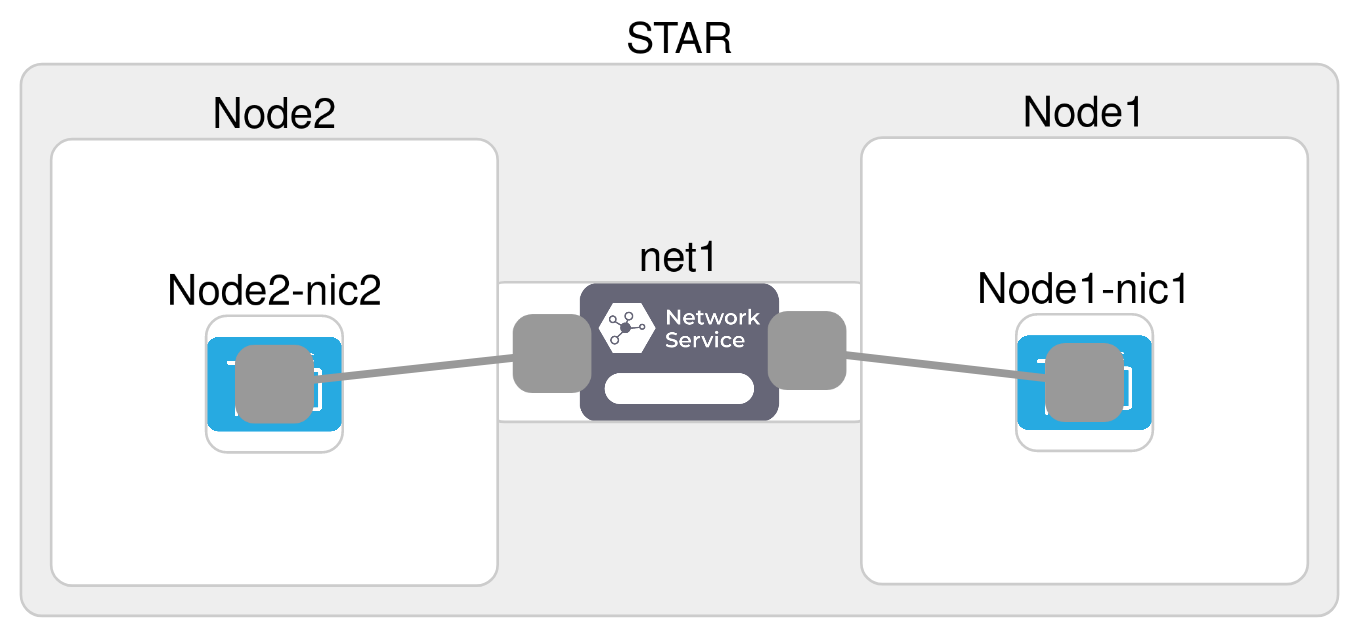

### Note:
Two methods are shown above to allocate resources to a node. For the first method, the value of <code>host</code> depends on the site you are choosing. If suppose it is TACC then it will be <code> host='TACC-w2.fabric-testbed.net'</code> 

For the second method <code>instance_type</code> is used, which accepts strings of predefined configuration. A list of predefined configuration can be found [here](https://github.com/fabric-testbed/InformationModel/blob/master/fim/slivers/data/instance_sizes.json)

During the submission of the slice it may take a few minutes in the average case scenario. Also note that because of load and other technical difficulties in fabric testbed it may not go through sometimes. 

### Checking slice status

To check the current status of the slice. That is whether a slice is stableOK or configuring/deleting/etc. It also help in finding out the slice end time (or Lease End time)

In [6]:
try:
    slice = fablib.get_slice(name=slice_name)
    print(f"{slice}")
except Exception as e:
    print(f"Exception: {e}")

-----------  ------------------------------------
Slice Name   two_node_exp
Slice ID     bc7b16c9-2e11-436a-aadd-c4931cf3cb91
Slice State  StableOK
Lease End    2022-10-03 00:34:07 +0000
-----------  ------------------------------------


### To list the properties of the nodes in the slice.


In [7]:
try:
    for node in slice.get_nodes():
        print(f"{node}")
except Exception as e:
    print(f"Exception: {e}")

-----------------  ------------------------------------------------------------------------------------------------------------------------------------------------
ID                 7b868a57-cf55-4e21-b4e3-0512e41c7227
Name               Node1
Cores              8
RAM                16
Disk               100
Image              default_ubuntu_20
Image Type         qcow2
Host               star-w2.fabric-testbed.net
Site               STAR
Management IP      2001:400:a100:3030:f816:3eff:fec8:7491
Reservation State  Active
Error Message
SSH Command        ssh -i /home/fabric/work/fabric_config/slice_key -J mjdbz4_0000018266@bastion-1.fabric-testbed.net ubuntu@2001:400:a100:3030:f816:3eff:fec8:7491
-----------------  ------------------------------------------------------------------------------------------------------------------------------------------------
-----------------  ----------------------------------------------------------------------------------------------------------------

In [8]:
# Instead of a full blown list you can list all the nodes in a compact table.
try:
    slice = fablib.get_slice(name=slice_name)

    print(f"{slice.list_nodes()}")
except Exception as e:
    print(f"Exception: {e}")

ID                                    Name    Site    Host                          Cores    RAM    Disk  Image              Management IP                           State    Error
------------------------------------  ------  ------  --------------------------  -------  -----  ------  -----------------  --------------------------------------  -------  -------
7b868a57-cf55-4e21-b4e3-0512e41c7227  Node1   STAR    star-w2.fabric-testbed.net        8     16     100  default_ubuntu_20  2001:400:a100:3030:f816:3eff:fec8:7491  Active
533ea3ac-23c7-4f03-9829-2d5bd5ae6390  Node2   STAR    star-w2.fabric-testbed.net        8     16      10  default_ubuntu_20  2001:400:a100:3030:f816:3eff:feb9:2d3a  Active


In [33]:
# To find the properties of the network interface 
try:
    slice = fablib.get_slice(name=slice_name)
    
    print(f"{slice.list_interfaces()}")
except Exception as e:
    print(f"Exception: {e}")

Name           Node    Network      Bandwidth  VLAN    MAC                Physical OS Interface    OS Interface
-------------  ------  ---------  -----------  ------  -----------------  -----------------------  --------------
Node1-nic1-p1  Node1   net1                 0          0A:07:62:7E:09:E1  ens7                     ens7
Node2-nic2-p1  Node2   net1                 0          0A:28:B5:6D:ED:AC  ens7                     ens7


### Configuring the Network

At first pick a subnet. The subnet can be IPv4 or IPv6. Below IPv4 is used.

In [10]:
from ipaddress import IPv4Address, IPv4Network

try:
    subnet=IPv4Network("192.168.1.0/24")
    available_ips=list(subnet)[1:]
except Exception as e:
    print(f"Exception: {e}")

### Assigning IP address to a network interface of a node

A network is created between node1 and node2, the assigned name of the network is 'net1'. This name is given at the time of slice creation, please look at the section "creating a slice" above. So, 'net1' is a network created between two NIC interfaces of the two nodes. IP addresses need to be assigned to these interfaces. There may be more than one NIC on a node for a certain type of experiment, assigning IP to the correct interface is important. In this experiment only one NIC is assigned to a node.

In [11]:
#Configuring Node1

try:
    node1=slice.get_node(name=node1_name)
    node1_iface=node1.get_interface(network_name=network_name)
    node1_IP_addr=available_ips.pop(0)
    node1_iface.ip_addr_add(addr=node1_IP_addr, subnet=subnet)
    
    stdout,stderr=node1.execute(f"ip addr show {node1_iface.get_os_interface()}")
    print(stdout)
    
except Exception as e:
    print(f"Exception: {e}")

3: ens7: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc mq state UP group default qlen 1000
    link/ether 0a:07:62:7e:09:e1 brd ff:ff:ff:ff:ff:ff
    inet 192.168.1.1/24 scope global ens7
       valid_lft forever preferred_lft forever
    inet6 fe80::807:62ff:fe7e:9e1/64 scope link 
       valid_lft forever preferred_lft forever



In [12]:
# Configuring Node2, Both Node1 and Node2 can be configure as a for loop also.

try:
    node2=slice.get_node(name=node2_name)
    node2_iface=node2.get_interface(network_name=network_name)
    node2_IP_addr=available_ips.pop(0)
    node2_iface.ip_addr_add(addr=node2_IP_addr, subnet=subnet)
    
    stdout, stderr=node2.execute(f"ip addr show {node2_iface.get_os_interface()}")
    print(stdout)
    
except Exception as e:
    print(f"Exception: {e}")

3: ens7: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc mq state UP group default qlen 1000
    link/ether 0a:28:b5:6d:ed:ac brd ff:ff:ff:ff:ff:ff
    inet 192.168.1.2/24 scope global ens7
       valid_lft forever preferred_lft forever
    inet6 fe80::828:b5ff:fe6d:edac/64 scope link 
       valid_lft forever preferred_lft forever



### Checking the accessibility of one node to another.

A simple way to check whether a node is accessible is to ping it. 

In [17]:
try:
    node1=slice.get_node(name=node1_name)
    
    stdout,stderr=node1.execute(f' ping -c 3 {node2_IP_addr}')
    print(stdout)
    print(stderr)
    
except Exception as e:
    print(f'Exception: {e}')    

PING 192.168.1.2 (192.168.1.2) 56(84) bytes of data.
64 bytes from 192.168.1.2: icmp_seq=1 ttl=64 time=0.117 ms
64 bytes from 192.168.1.2: icmp_seq=2 ttl=64 time=0.086 ms
64 bytes from 192.168.1.2: icmp_seq=3 ttl=64 time=0.079 ms

--- 192.168.1.2 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2031ms
rtt min/avg/max/mdev = 0.079/0.094/0.117/0.016 ms




### Deleting the node

It is important to delete the slice when the experiment is over. This is good practice.

In [ ]:
try:
    slice=fablib.get_slice(name=slice_name)
    slice.delete()
except Exception as e:
    print(f"Exception: {e}")